In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import *
import tensorflow as tf
from zipfile import ZipFile
from pathlib import Path
import os
import random

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [ ]:
# Load train and test sets
train_dir = Path('/content/drive/My Drive/MSDS 422/Assignment 7/train')
test_dir = Path('/content/drive/My Drive/MSDS 422/Assignment 7/test')

train_files = np.array(os.listdir(train_dir))
test_files = np.array(os.listdir(test_dir))
len(train_files), len(test_files)

(25022, 12500)

In [ ]:
# Create a dataframe of files and categories
categories= list()
for image in train_files:
    category = image.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")

df= pd.DataFrame({"Image":train_files, "Category": categories})

df.head()

,Image,Category
0,dog.9104.jpg,dog
1,dog.9095.jpg,dog
2,dog.9097.jpg,dog
3,dog.9088.jpg,dog
4,dog.9098.jpg,dog


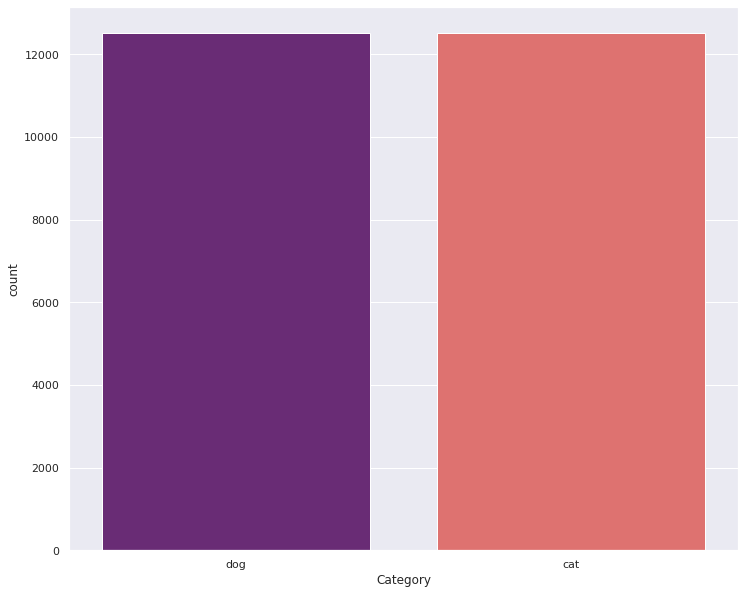

In [ ]:
# Distribution of category
plt.figure(figsize=(12,10))
sns.countplot(data=df, x="Category",palette="magma")

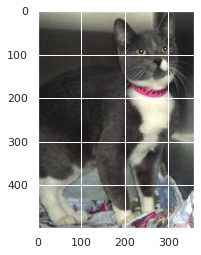

In [ ]:
# Plot an image
sample = random.choice(train_files)
plt.imshow(plt.imread(("/content/drive/My Drive/MSDS 422/Assignment 7/train/"+sample)))

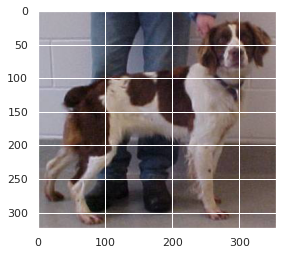

In [ ]:
# Plot an image
sample = random.choice(train_files)
plt.imshow(plt.imread(("/content/drive/My Drive/MSDS 422/Assignment 7/train/"+sample)))

In [ ]:
# Split data into test and validation sets
from sklearn.model_selection import train_test_split

train,validation= train_test_split(df, test_size=0.1)
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)

In [ ]:
train.head()

,Image,Category
0,cat.2075.jpg,cat
1,dog.8902.jpg,dog
2,dog.2753.jpg,dog
3,cat.9646.jpg,cat
4,cat.11350.jpg,cat


In [ ]:
validation.head()

,Image,Category
0,dog.100.jpg,dog
1,cat.7565.jpg,cat
2,cat.5587.jpg,cat
3,cat.3515.jpg,cat
4,cat.1347.jpg,cat


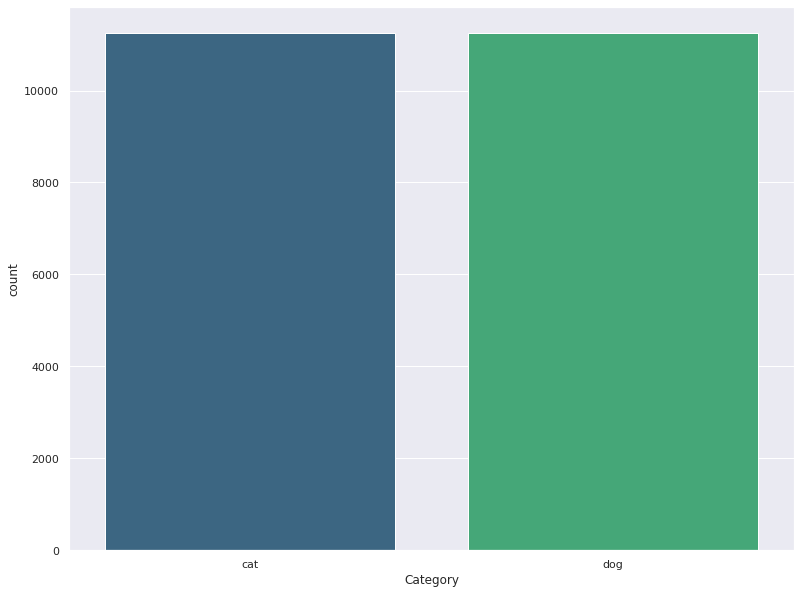

In [ ]:
# Distribution of categories in train data
plt.figure(figsize=(13,10))
sns.countplot(data=train, x="Category",palette="viridis")

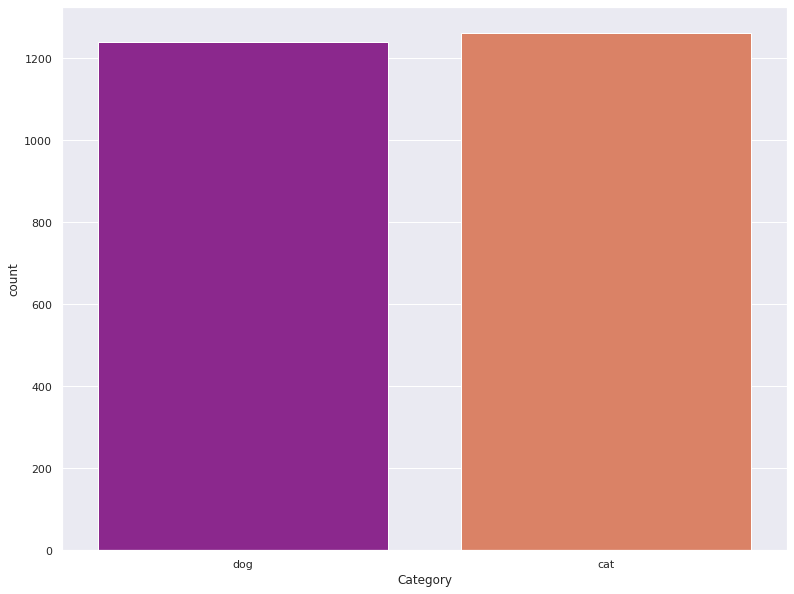

In [ ]:
# Distribution of categories in validation data
plt.figure(figsize=(13,10))
sns.countplot(data=validation, x="Category",palette="plasma")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory="/content/drive/My Drive/MSDS 422/Assignment 7/train",
                                                    x_col='Image',
                                                    y_col='Category',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 22519 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
validation_generator = validation_datagen.flow_from_dataframe(validation,
                                                    directory="/content/drive/My Drive/MSDS 422/Assignment 7/train",
                                                    x_col='Image',
                                                    y_col='Category',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 2503 validated image filenames belonging to 2 classes.


# Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import time

In [ ]:
names = ['Model 1',
         'Model 2',
         'Model 3',
         'Model 4']

layers = [6,6,9,9]

filters = [32,64,32,64]

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, strides=2))

model1.add(Flatten())
model1.add(Dense(units=1024, activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, strides=2))

model2.add(Flatten())
model2.add(Dense(units=1024, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, strides=2))

model3.add(Conv2D(filters=32, kernel_size=3,activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, strides=2))

model3.add(Flatten())
model3.add(Dense(units=1024, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=3,activation="relu", input_shape=(150,150,3)))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=2, strides=2))

model4.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=2, strides=2))

model4.add(Flatten())
model4.add(Dense(units=1024, activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(units=1, activation="sigmoid"))

In [ ]:
methods = [model1, model2, model3, model4]
index_for_method = 0 
training_performance_results = []
validation_performance_results = []
processing_time = []

In [ ]:
for name, method in zip(names, methods):
    print('\n------------------------------------')
    print('\nMethod:', name)
    print('\n  Specification of method:', method)
    start_time = time.clock()
    method.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    callback=EarlyStopping(monitor="val_loss", patience=2)
    callback_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=0.00001)
    
    checkpoint_path = "/content/drive/My Drive/MSDS 422/Assignment 7/" + str(method) + "/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', mode='max', 
                                                     verbose=1, save_best_only=True, save_freq='epoch')

    history = method.fit(train_generator, validation_data=validation_generator, epochs=8, callbacks=[callback,callback_lr,cp_callback])

    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time 
    print("\nProcessing time (seconds): %f" % runtime)        
    processing_time.append(runtime)

    # mean accuracy of prediction in training set
    training_performance = history.history['accuracy'][-1]
    print("\nTraining set accuracy: %f" % training_performance)
    training_performance_results.append(training_performance)

    # mean accuracy of prediction in validation set
    validation_performance = history.history['val_accuracy'][-1]
    print("\nValidation set accuracy: %f" % validation_performance)
    validation_performance_results.append(validation_performance)

    index_for_method += 1


------------------------------------

Method: Model 1

  Specification of method: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f28fba40110>
Epoch 1/8
1126/1126 [==============================] - 5442s 5s/step - loss: 4.2626 - accuracy: 0.6242 - val_loss: 0.5722 - val_accuracy: 0.7008

Epoch 00001: val_accuracy improved from -inf to 0.70076, saving model to /content/drive/My Drive/MSDS 422/Assignment 7/<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f28fba40110>/cp.ckpt
INFO:tensorflow:Assets written to: /content/drive/My Drive/MSDS 422/Assignment 7/<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f28fba40110>/cp.ckpt/assets
Epoch 2/8
1126/1126 [==============================] - 322s 286ms/step - loss: 0.4973 - accuracy: 0.7521 - val_loss: 0.6020 - val_accuracy: 0.6992

Epoch 00002: val_accuracy did not improve from 0.70076
Epoch 3/8
1126/1126 [==============================] - 319s 283ms/step - loss: 0.4033 - accuracy: 0.8116 

In [ ]:
from collections import OrderedDict 
 
pd.set_option('display.max_columns', None)

results = pd.DataFrame(OrderedDict([('Method Name', names),
                        ('Layers', layers),
                        ('Processing Time', processing_time),
                        ('Training Set Accuracy', training_performance_results),
                        ('Validation Set Accuracy', validation_performance_results)]))

print('\nBenchmark Experiment: Scikit Learn Artificial Neural Networks\n')
print(results) 


Benchmark Experiment: Scikit Learn Artificial Neural Networks

  Method Name Number of VGG Blocks  Processing Time  Training Set Accuracy  \
0     Model 1                VGG 1     26603.369070               0.811404   
1     Model 2                VGG 2     64128.499359               0.866069   
2     Model 3                VGG 3     14100.369358               0.838581   
3     Model 4                VGG 4     44081.114633               0.856166   

   Validation Set Accuracy  
0                 0.725529  
1                 0.691570  
2                 0.758290  
3                 0.790651  


# Test Data

In [ ]:
test_dir = '/content/drive/My Drive/MSDS 422/Assignment 7/test'
test_images = os.listdir(os.path.join(test_dir))
test_images[:10]

['9085.jpg',
 '9086.jpg',
 '910.jpg',
 '9084.jpg',
 '9092.jpg',
 '9112.jpg',
 '9116.jpg',
 '9113.jpg',
 '912.jpg',
 '9121.jpg']

In [ ]:
test_df = pd.DataFrame({'Image': test_images})
test_df.head()

,Image
0,9085.jpg
1,9086.jpg
2,910.jpg
3,9084.jpg
4,9092.jpg


In [ ]:
test_id = test_df['Image'].str.split('.jpg').str[0]
test_id

0         9085
1         9086
2          910
3         9084
4         9092
         ...  
12495    10425
12496    10443
12497    10445
12498    10440
12499    10433
Name: Image, Length: 12500, dtype: object

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  directory="/content/drive/My Drive/MSDS 422/Assignment 7/test",
                                                  x_col="Image",
                                                  y_col=None,
                                                  class_mode  = None,
                                                  target_size=(150,150),
                                                  shuffle = True,
                                                  batch_size=20)

Found 12500 validated image filenames.


In [ ]:
def labelizor(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0

In [ ]:
# load a saved model
from tensorflow.keras.models import load_model
from google.colab import files

checkpoint_path1 = "/content/drive/My Drive/MSDS 422/Assignment 7/" + str("model1a") + "/cp.ckpt"

model1a = load_model(checkpoint_path1)
predictions1 = model1a.predict(test_generator,steps = np.ceil(12500/20))
test_df1=pd.DataFrame(predictions1, columns=["label"])
# test_df1["label"] = test_df1["label"].apply(labelizor)
test_df1["id"] = test_id
submission_df1 = test_df1.copy()
submission_df1.to_csv('submission1.csv', index=False)
files.download("submission1.csv")
submission_df1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,id
0,0.000079,9085
1,0.912207,9086
2,0.002603,910
3,0.982966,9084
4,0.497554,9092
...,...,...
12495,0.062648,10425
12496,0.958108,10443
12497,0.650250,10445
12498,0.618339,10440


In [ ]:
# load a saved model
checkpoint_path2 = "/content/drive/My Drive/MSDS 422/Assignment 7/" + str("model2a") + "/cp.ckpt"

model2a = load_model(checkpoint_path2)
predictions2 = model2a.predict(test_generator,steps = np.ceil(12500/20))
test_df2=pd.DataFrame(predictions2, columns=["label"])
# test_df2["label"] = test_df2["label"].apply(labelizor)
test_df2["id"] = test_id
submission_df2 = test_df2.copy()
submission_df2.to_csv('submission2.csv', index=False)
files.download("submission2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load a saved model
checkpoint_path3 = "/content/drive/My Drive/MSDS 422/Assignment 7/" + str("model3a") + "/cp.ckpt"

model3a = load_model(checkpoint_path3)
predictions3 = model3a.predict(test_generator,steps = np.ceil(12500/20))
test_df3=pd.DataFrame(predictions3, columns=["label"])
# test_df3["label"] = test_df3["label"].apply(labelizor)
test_df3["id"] = test_id
submission_df3 = test_df3.copy()
submission_df3.to_csv('submission3.csv', index=False)
files.download("submission3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load a saved model
checkpoint_path4 = "/content/drive/My Drive/MSDS 422/Assignment 7/" + str("model4a") + "/cp.ckpt"

model4a = load_model(checkpoint_path4)
predictions4 = model4a.predict(test_generator,steps = np.ceil(12500/20))
test_df4=pd.DataFrame(predictions4, columns=["label"])
# test_df4["label"] = test_df4["label"].apply(labelizor)
test_df4["id"] = test_id
submission_df4 = test_df4.copy()
submission_df4.to_csv('submission4.csv', index=False)
files.download("submission4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle Result

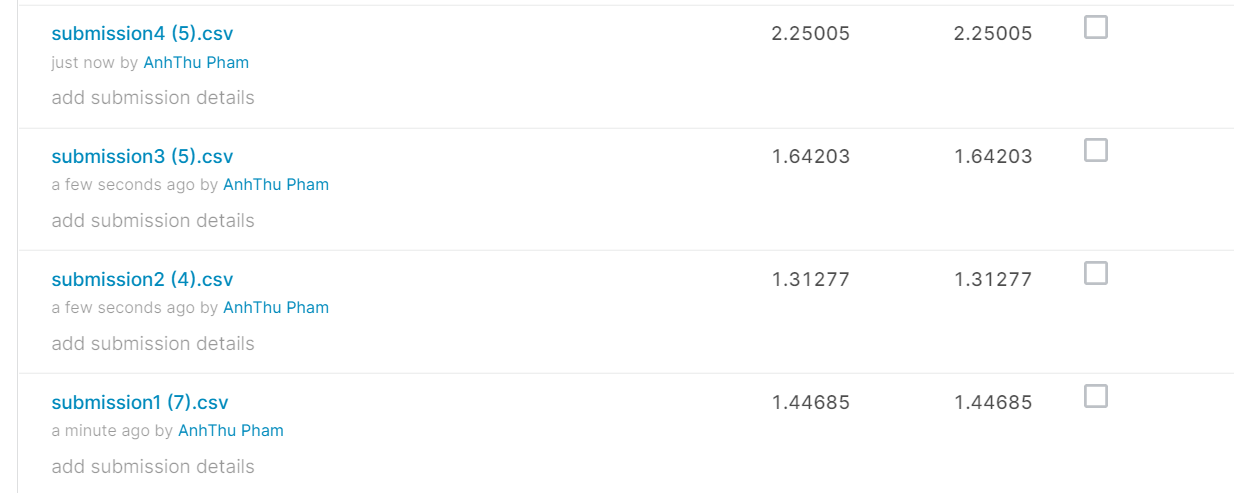

In [ ]:
from PIL import Image

# Kaggle Score
path = "/content/drive/My Drive/MSDS 422/Assignment 7/result.PNG"
img  = Image.open(path) 
img

# Exposition

The purpose of this project is to correctly classify photographs of dogs and cats. It utilizes convolutional neural network, which is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. There are 4 different models. The submissions to Kaggle are scored on the log loss.

The 1st model has 6 layers with filters 32 for Conv2D layer. The training accuracy is 81.16%. The validation accuracy is 72.55%. The Kaggle score is 1.44.

The 2nd model has 6 layers with filters 64 for Conv2D layer. The training accuracy is 75.47%. The validation accuracy is 71.59%. The Kaggle score is 1.31.

The 3rd model has 9 layers with filters 32 for Conv2D layers. The training accuracy is 83.79%. The validation accuracy is 75.83%. The Kaggle score is 1.64.

The 4th model has 9 layers with filters 32 for Conv2D layers. The training accuracy is 85.87%. The validation accuracy is 79.07%. The Kaggle score is 2.25.